Wall time: 6min 20s

- [] Check the Hamiltonian

In [1]:
NOTEBOOK_NAME = "mb-solve-vee-sech-0.5pi-1.5pi"

In [2]:
import numpy as np

sech_fwhm_conv = 1./2.6339157938
t_width = 1.0*sech_fwhm_conv # [τ]

print('t_width', t_width)

n = 0.5 # For a pulse area of nπ    
ampl = n/t_width/(2*np.pi) # Pulse amplitude [2π Γ]

print('ampl', ampl)

n = 1.5 # For a pulse area of nπ    
ampl_2 = n/t_width/(2*np.pi) # Pulse amplitude [2π Γ]

print('ampl_2', ampl_2)

t_width 0.3796628587572578
ampl 0.20960035913554168
ampl_2 0.628801077406625


In [3]:
a = 0.5 #np.sqrt(2)
b = 1.5 #np.sqrt(2)

np.sqrt(a**2 + b**2)

1.5811388300841898

In [4]:
mb_solve_json = """
{
  "atom": {
    "decays": [
      { "channels": [[0,1], [0,2]], 
        "rate": 0.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 0.20960035913554168,
        "rabi_freq_t_args": 
          {
             "ampl": 1.0,
             "centre": 0.0,
             "width": 0.3796628587572578
          },
        "rabi_freq_t_func": "sech"
      },
      {
        "coupled_levels": [[0, 2]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "coupling",
        "rabi_freq": 0.628801077406625,
        "rabi_freq_t_args": 
          {
             "ampl": 1.0,
             "centre": 0.0,
             "width": 0.3796628587572578
          },
        "rabi_freq_t_func": "sech"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 1,
  "num_density_z_func": "square",
  "num_density_z_args": {
    "on": 0.0,
    "off": 1.0,
    "ampl": 1.0
  },
  "interaction_strengths": [10.0, 10.0],
  "velocity_classes": {},
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/%s"
}
"""%(NOTEBOOK_NAME)

In [5]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False)

Loaded tuple object.
CPU times: user 4.09 ms, sys: 5.43 ms, total: 9.52 ms
Wall time: 13.3 ms


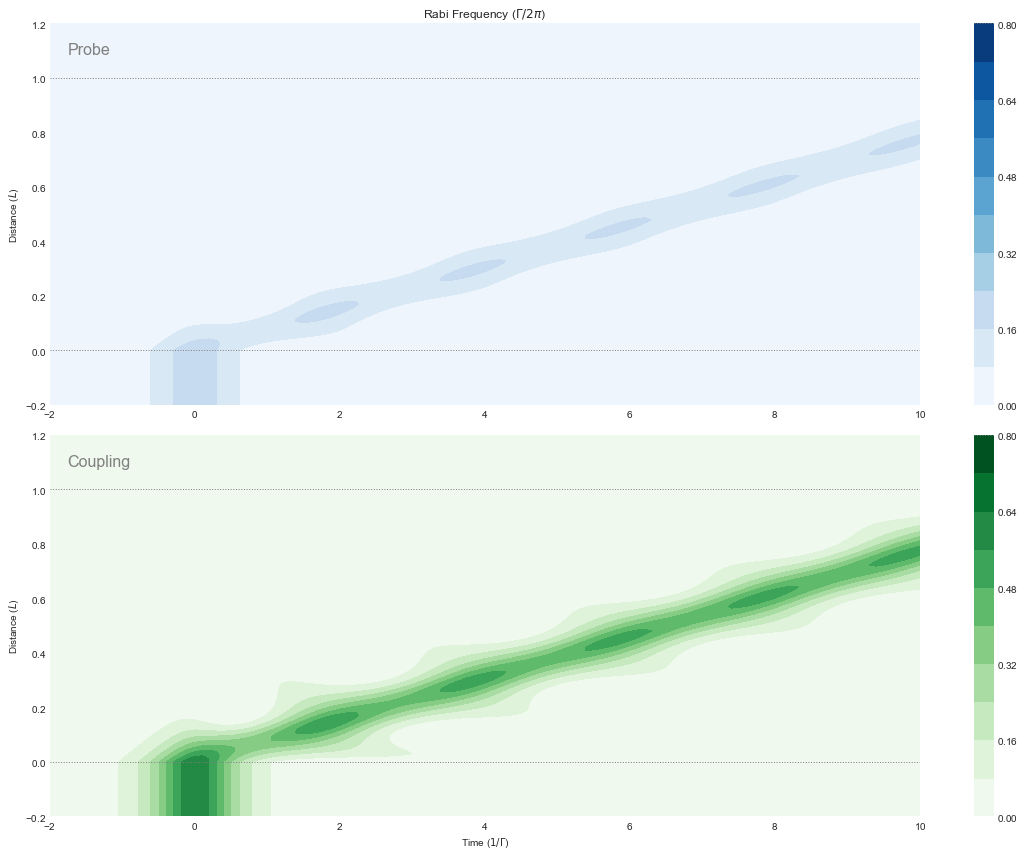

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(16, 12))

# Probe 
ax = fig.add_subplot(211)
cmap_range = np.linspace(0.0, 0.8, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Probe',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Coupling
ax = fig.add_subplot(212)
cmap_range = np.linspace(0.0, 0.8, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[1]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Greens)
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Coupling',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Both
for ax in fig.axes:
    for y in [0.0, 1.0]:
        ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.tight_layout()

plt.savefig('images/{0}_1.png'.format(NOTEBOOK_NAME))

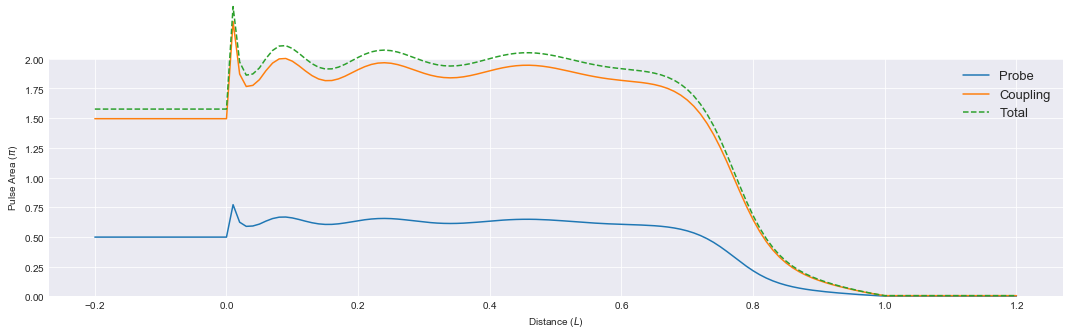

In [7]:
total_area = np.sqrt(mb_solve_00.fields_area()[0]**2 + mb_solve_00.fields_area()[1]**2)

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(mb_solve_00.zlist, mb_solve_00.fields_area()[0]/np.pi, label='Probe', clip_on=False)
ax.plot(mb_solve_00.zlist, mb_solve_00.fields_area()[1]/np.pi, label='Coupling', clip_on=False)
ax.plot(mb_solve_00.zlist, total_area/np.pi, label='Total', ls='dashed', clip_on=False)
ax.legend()
ax.set_ylim([0.0, 2.0])
ax.set_xlabel('Distance ($L$)')
ax.set_ylabel('Pulse Area ($\pi$)');